# Rain Detection and Prediction
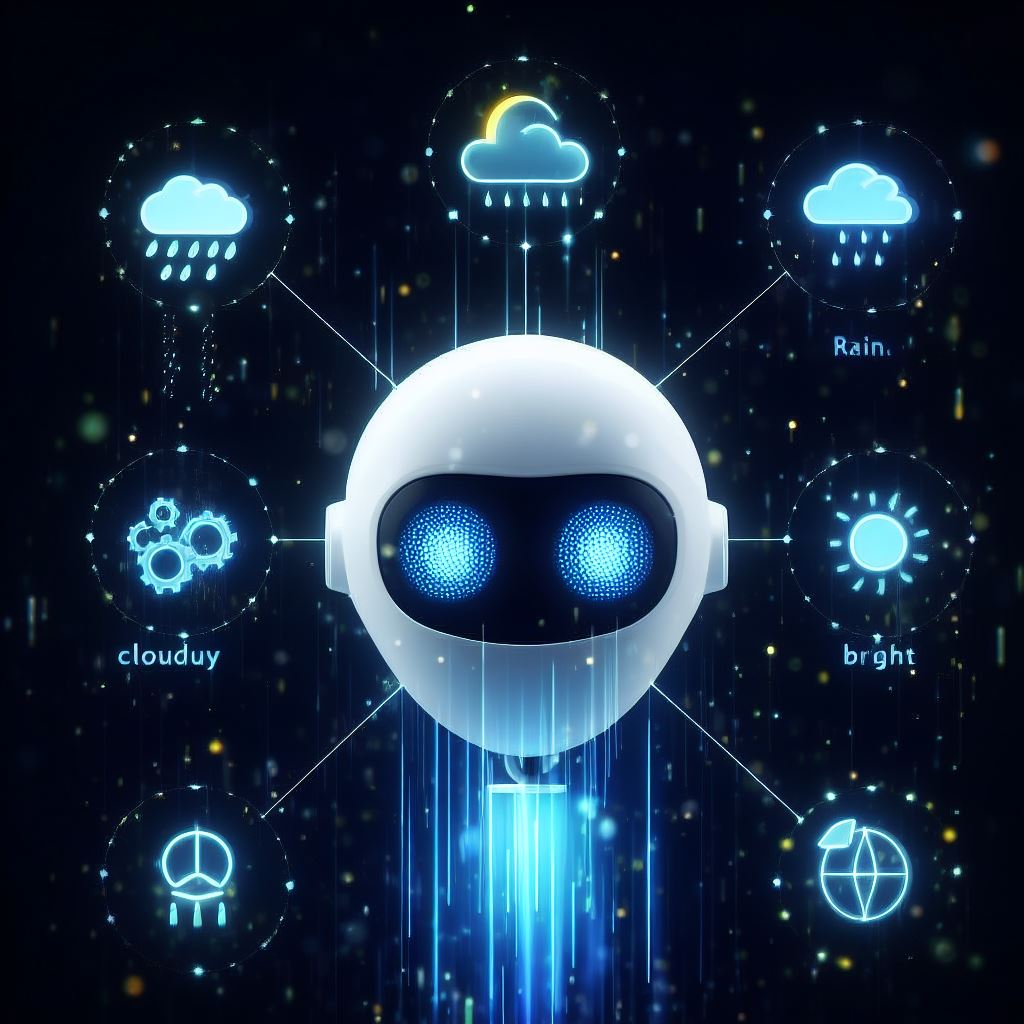

Projek ini adalah perpaduan antara sains data dan meteorologi untuk memprediksi hujan berdasarkan data cuaca harian yang disediakan oleh BMKG. Dalam proyek ini, kita melakukan langkah-langkah dasar sains data, seperti preprocessing data, pembuatan model machine learning, dan visualisasi hasilnya.

## Preprocessing Data:
Data cuaca yang diberikan oleh BMKG memiliki berbagai parameter seperti temperatur, curah hujan, kecepatan angin, dan lainnya. Namun, data ini perlu diolah sebelum dapat digunakan dalam model machine learning. Oleh karena itu, kita melakukan tahapan preprocessing, termasuk mengatasi masalah format data, mengonversi tipe data, dan menangani nilai yang hilang.

## Modeling:
Kemudian, kita menggunakan algoritma RandomForestRegressor untuk membuat model prediksi curah hujan. RandomForestRegressor adalah model machine learning yang kuat dan mampu menangani hubungan yang kompleks antara parameter-parameter cuaca. Setelah melatih model, kita mengukur kinerjanya dan mencari parameter terbaik untuk meningkatkan akurasi prediksi.

## Visualisasi:
Visualisasi merupakan bagian penting dalam sains data. Dalam proyek ini, kita memvisualisasikan hasil prediksi curah hujan menggunakan grafik, membandingkan hasil prediksi dengan data aktual, dan memberikan pemahaman yang lebih baik tentang pola cuaca yang mungkin terjadi.

arameter yang digunakan untuk mendeteksi hujan dapat bervariasi tergantung pada data dan model yang digunakan. Namun, beberapa parameter umum yang sering digunakan dalam prediksi hujan meliputi:

Curah Hujan (RR): Jumlah hujan yang diukur dalam milimeter atau sentimeter. Ini adalah parameter langsung yang mencerminkan jumlah air yang jatuh dalam bentuk hujan.

Kelembapan Rata-rata (RH_avg): Persentase kelembapan rata-rata udara. Tingkat kelembapan dapat mempengaruhi kemungkinan terjadinya hujan.

Lamanya Penyinaran Matahari (ss): Jumlah jam penyinaran matahari dalam satu hari. Lamanya penyinaran matahari dapat memberikan informasi tentang kondisi cuaca dan potensi terjadinya hujan.

Kecepatan Angin Rata-rata (ff_avg): Kecepatan rata-rata angin dalam satuan tertentu. Angin dapat mempengaruhi pola awan dan hujan.

Temperatur (Tn, Tx, Tavg): Temperatur minimum, maksimum, atau rata-rata. Perubahan suhu dapat mempengaruhi pembentukan awan dan potensi hujan.

Arah Angin (ddd_x): Arah angin dalam derajat. Arah angin juga dapat mempengaruhi pergerakan awan dan hujan.



In [ ]:
# import library
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# import dataset
df = pd.read_csv('data-fix.csv')
df.head()

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01/01/2000,25,"30,2","27,9",86.0,"4,5","5,2",5.0,180.0,2.0,SW
1,02/01/2000,25,"30,6",27,82.0,6,"4,8",9.0,225.0,2.0,N
2,03/01/2000,24,31,"27,7",80.0,"5,5",8,7.0,180.0,2.0,SW
3,04/01/2000,24,"30,6","26,3",86.0,0,"3,2",5.0,225.0,1.0,SW
4,05/01/2000,24,31,"25,7",90.0,4,4,12.0,315.0,2.0,S


In [ ]:
# drop dataset time and wind direction
df_baru = df.drop(['Tanggal', 'ddd_car'], axis= 1)
df_baru.head()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
0,25,"30,2","27,9",86.0,"4,5","5,2",5.0,180.0,2.0
1,25,"30,6",27,82.0,6,"4,8",9.0,225.0,2.0
2,24,31,"27,7",80.0,"5,5",8,7.0,180.0,2.0
3,24,"30,6","26,3",86.0,0,"3,2",5.0,225.0,1.0
4,24,31,"25,7",90.0,4,4,12.0,315.0,2.0


In [ ]:
# convert value 8888 to NaN
df_baru['RR'] = pd.to_numeric(df_baru['RR'], errors='coerce')
rr_average = df_baru['RR'].mean()
df_baru['RR'].replace(8888, rr_average, inplace=True)

In [ ]:
# convert str to float and another preprocessing
df_baru.replace({',': '.'}, regex=True, inplace=True)
data = df_baru.astype(float)
data.tail()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
8454,21.4,32.2,NaN,NaN,0.000000,9.5,4.0,110.0,2.0
8455,20.0,32.2,NaN,NaN,0.000000,10.8,3.0,260.0,1.0
8456,19.6,32.2,NaN,NaN,1032.518292,7.3,3.0,250.0,1.0
8457,22.2,32.4,28.9,75.0,0.000000,10.4,4.0,190.0,2.0
8458,23.2,32.1,28.4,80.0,NaN,8.7,3.0,240.0,1.0


In [ ]:
# Count the number of occurrences of the value 8888 in the DataFrame
count_8888 = (data == 8888).sum().sum()

print(f"jumlah data yang bernilai 8888: {count_8888}")



jumlah data yang bernilai 8888: 0


In [ ]:
X = data.drop('RR', axis=1)  # Fitur
y = data['RR']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('jumlah data training : ', len(X_train))
print('jumlah data testing : ', len(X_test))

jumlah data training :  6767
jumlah data testing :  1692


In [ ]:
imputer_X = SimpleImputer(strategy='mean')
X_train_scaled = imputer_X.fit_transform(X_train)
X_test_scaled = imputer_X.transform(X_test)

In [ ]:
# checking NaN Before and After in data training
print(f"NaN in y_train: {y_train.isnull().sum()}")


imputer = SimpleImputer(strategy='mean')
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1))
y_train = pd.Series(y_train_imputed.flatten())

print(f"NaN in y_train after imputation: {y_train.isnull().sum()}")

NaN in y_train: 2461
NaN in y_train after imputation: 0


In [ ]:
# checking NaN Before and After in data testing
print(f"NaN in y_test: {y_test.isnull().sum()}")
y_test_imputed = imputer.transform(y_test.values.reshape(-1, 1))
y_test = pd.Series(y_test_imputed.flatten())
print(f"NaN in y_test after imputation: {y_test.isnull().sum()}")

NaN in y_test: 613
NaN in y_test after imputation: 0


In [ ]:
# model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Mesurement
score = model.score(X_test_scaled, y_test)
print(f"R-squared Score: {score}")

R-squared Score: -0.1334587121538824


In [ ]:
# define parameter
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Make model RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# look for best parameter using GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)


print("Best Parameters:", grid_search.best_params_)

# tarin with best parameter
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)


score = best_model.score(X_test_scaled, y_test)
print(f"R-squared Score: {score}")

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
R-squared Score: -0.026810484392858935


In [ ]:
results = pd.DataFrame(grid_search.cv_results_)

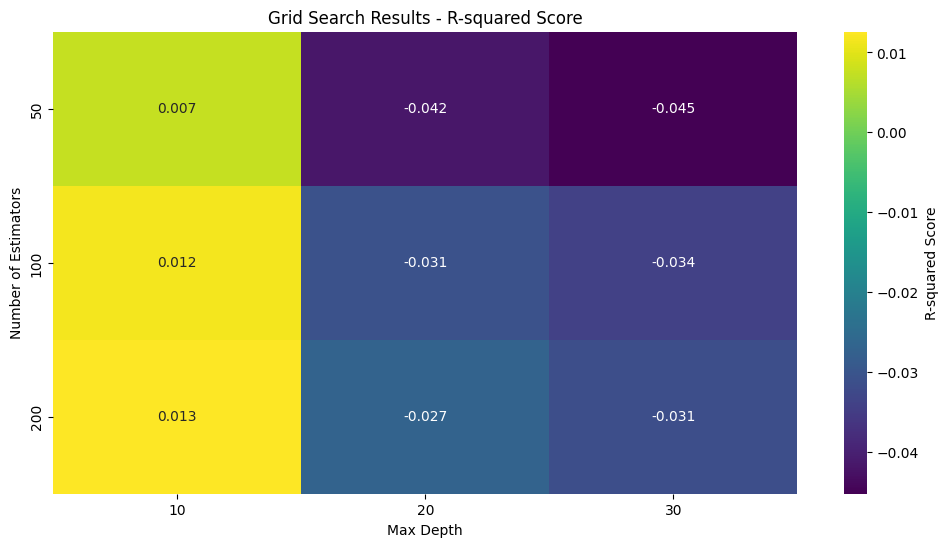

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
R-squared Score on Test Set: -0.026810484392858935


In [ ]:
plt.figure(figsize=(12, 6))
heatmap_data = results.pivot_table(index='param_n_estimators', columns='param_max_depth', values='mean_test_score', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.3f', cbar_kws={'label': 'R-squared Score'})
plt.title('Grid Search Results - R-squared Score')
plt.xlabel('Max Depth')
plt.ylabel('Number of Estimators')
plt.show()

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
score = best_model.score(X_test_scaled, y_test)
print(f"R-squared Score on Test Set: {score}")

In [ ]:
import ipywidgets as widgets
from IPython.display import display


labels = ["Tn", "Tx", "Tavg", "RH_avg", "ss", "ff_x", "ddd_x", "ff_avg"]
entries = []

for label in labels:
    entry = widgets.FloatText(description=label)
    entries.append(entry)


predict_button = widgets.Button(description="Predict Weather")


result_label = widgets.HTML()


def predict_weather(b):
    new_data = {
        'Tn': float(entries[0].value),
        'Tx': float(entries[1].value),
        'Tavg': float(entries[2].value),
        'RH_avg': float(entries[3].value),
        'ss': float(entries[4].value),
        'ff_x': float(entries[5].value),
        'ddd_x': float(entries[6].value),
        'ff_avg': float(entries[7].value)
    }


    new_data_df = pd.DataFrame([new_data])
    scaler = StandarScaler()
    new_data_scaled = scaler.transform(new_data_df)
    predicted_rainfall = best_model.predict(new_data_scaled)

    # Interpretasi hasil prediksi
    if predicted_rainfall[0] > 5:
        prediction_result = "Hujan"
    elif predicted_rainfall[0] <= 5 and predicted_rainfall[0] > 1:
        prediction_result = "Mendung"
    else:
        prediction_result = "Cerah"

    result_label.value = f"Prediction Result: {prediction_result}, Predicted Rainfall: {predicted_rainfall[0]} mm"

predict_button.on_click(predict_weather)


display(*entries, predict_button, result_label)


FloatText(value=0.0, description='Tn')

FloatText(value=0.0, description='Tx')

FloatText(value=0.0, description='Tavg')

FloatText(value=0.0, description='RH_avg')

FloatText(value=0.0, description='ss')

FloatText(value=0.0, description='ff_x')

FloatText(value=0.0, description='ddd_x')

FloatText(value=0.0, description='ff_avg')

Button(description='Predict Weather', style=ButtonStyle())

HTML(value='')

NotFittedError: ignored